In [1]:
!wget -r https://github.com/ankislyakov/data/raw/main/diabetes.csv

--2024-03-25 19:56:42--  https://github.com/ankislyakov/data/raw/main/diabetes.csv
Распознаётся github.com (github.com)… 140.82.121.4
Подключение к github.com (github.com)|140.82.121.4|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/ankislyakov/data/main/diabetes.csv [переход]
--2024-03-25 19:56:43--  https://raw.githubusercontent.com/ankislyakov/data/main/diabetes.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 23873 (23K) [text/plain]
Сохранение в: «github.com/ankislyakov/data/raw/main/diabetes.csv»

github.com/ankislya 100%[===================>]  23,31K  --.-KB/s    за 0,004s  

2024-03-25 19:56:43 (5,79 MB/s) - «github.com/ankislyakov/data/raw/main/diabetes.csv» с

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


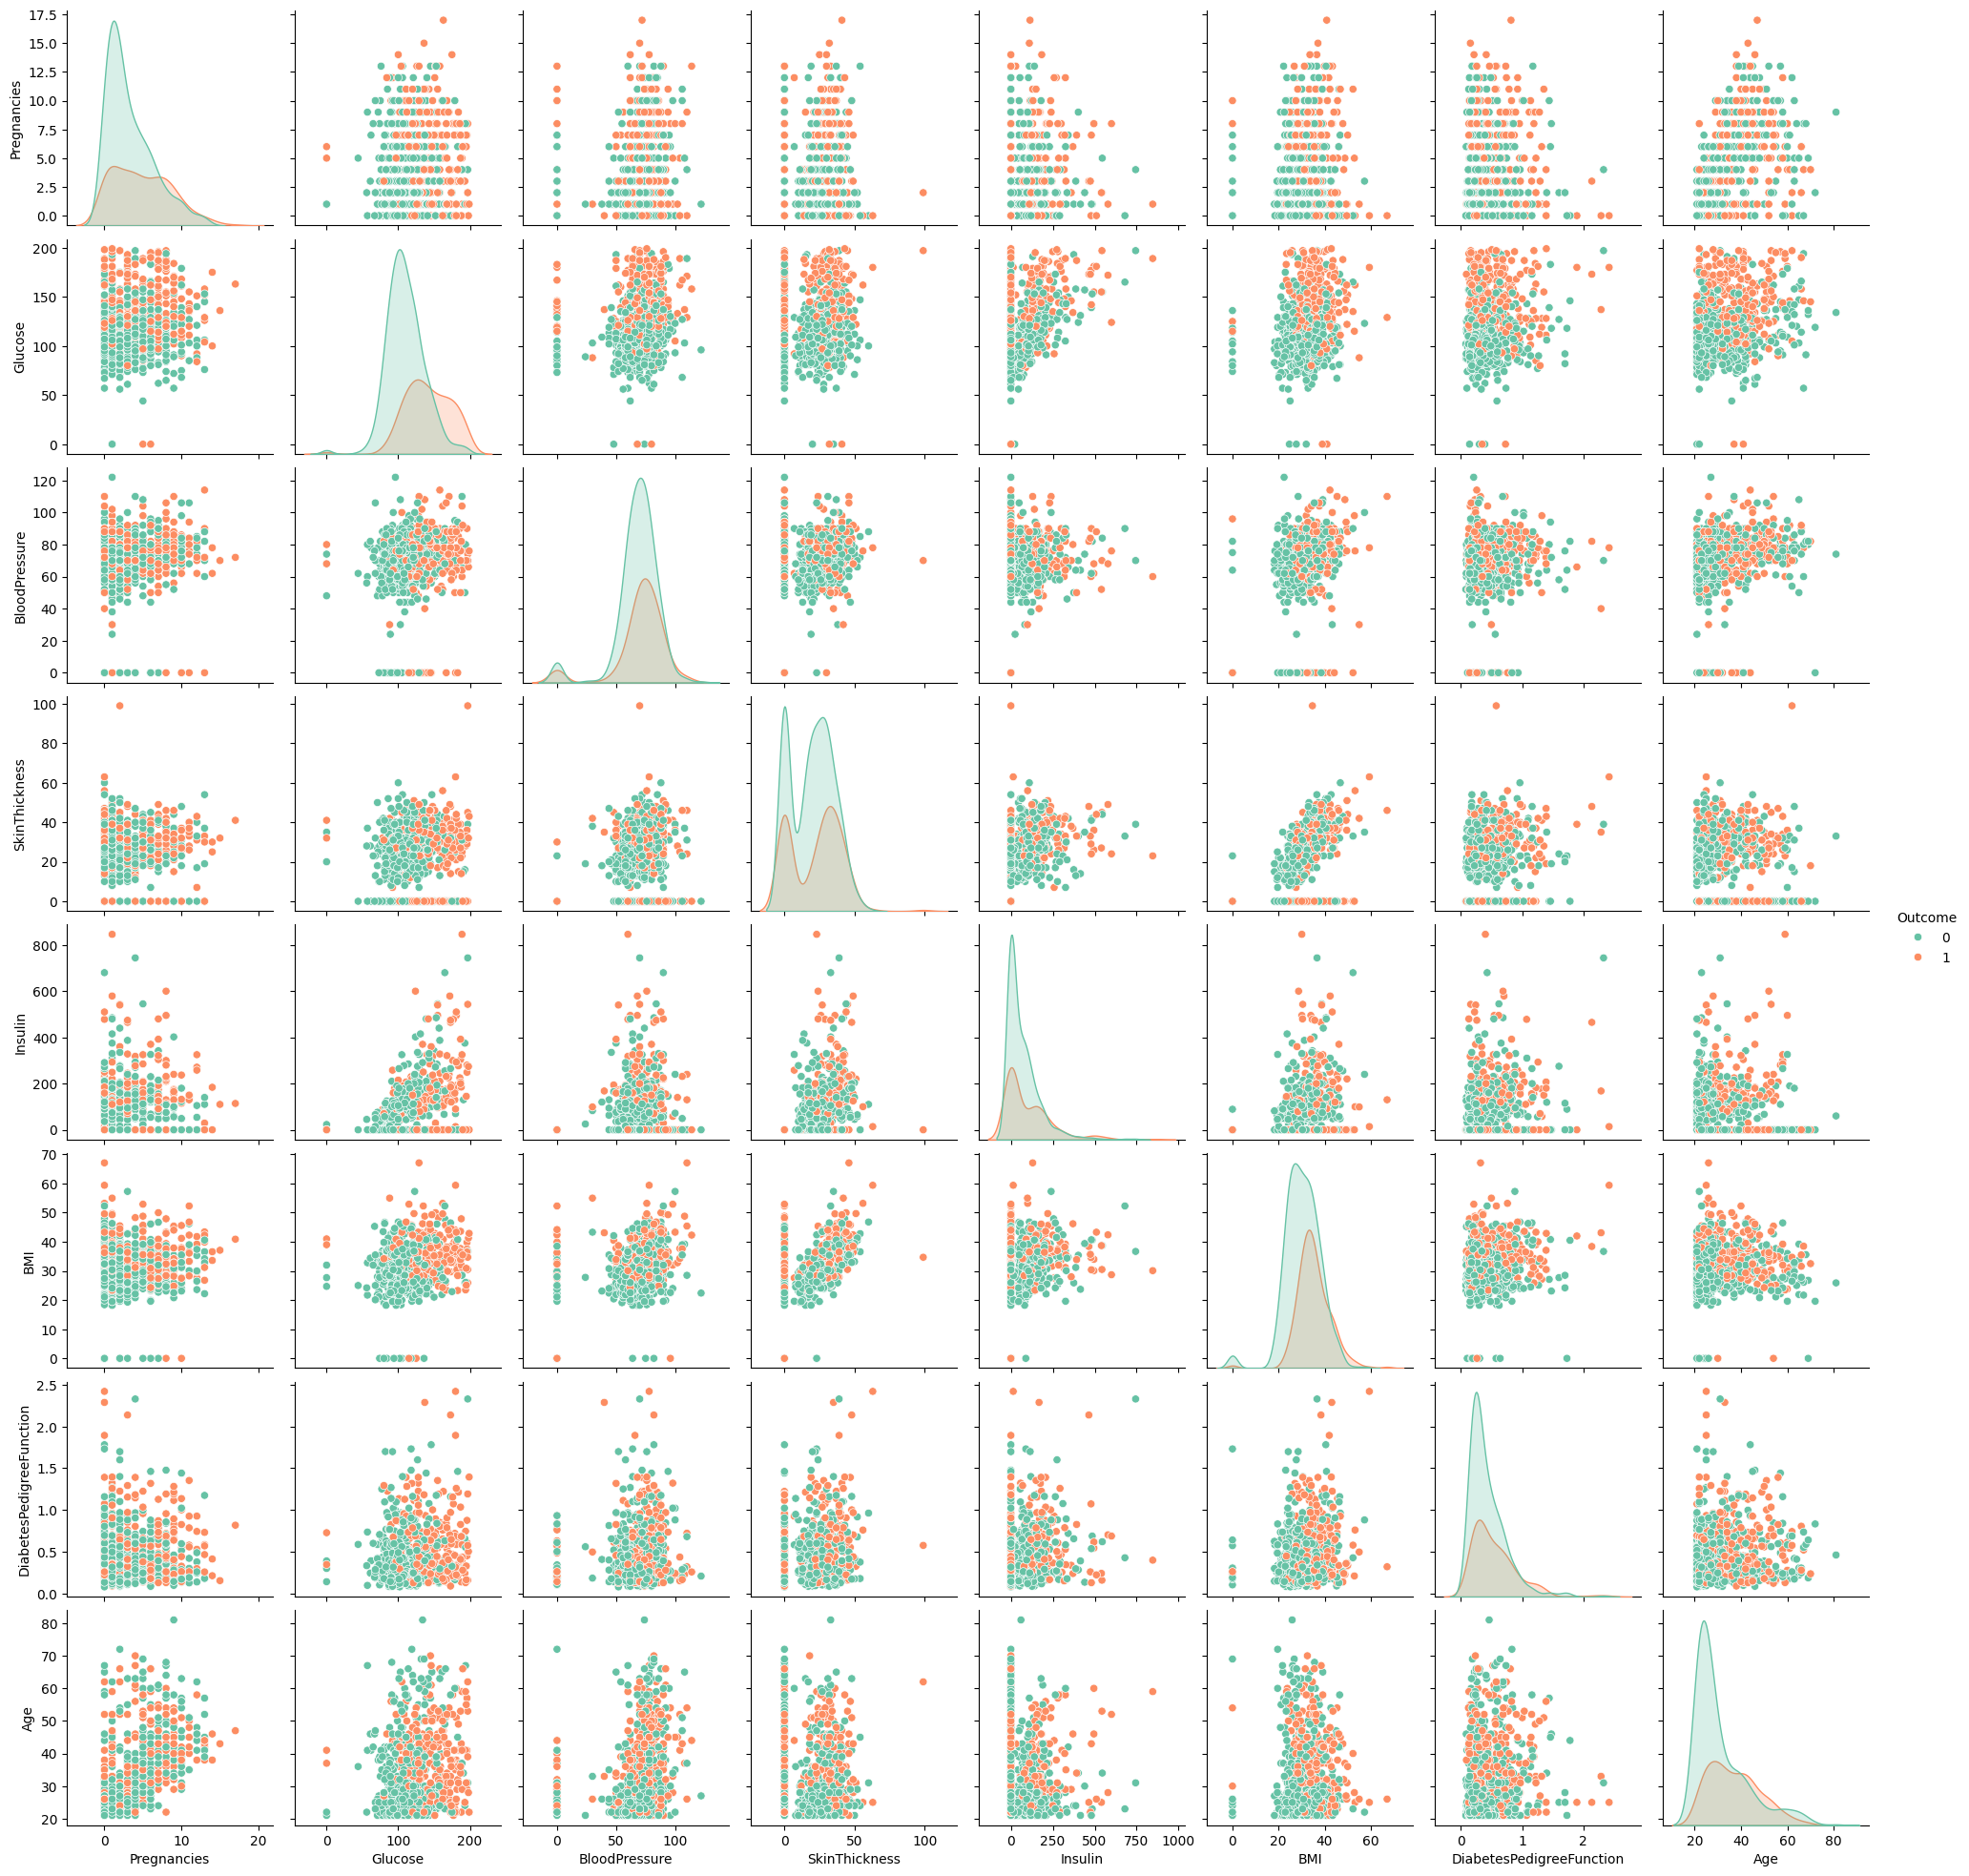

In [7]:
sns.pairplot(data=data,
            hue='Outcome',
            palette='Set2')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import roc_auc_score, \
    accuracy_score, precision_score, recall_score, f1_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Outcome'], axis=1),
    data['Outcome'],
    test_size=0.3,
    stratify=data['Outcome'],
    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model_LogR = LogisticRegression()
model_LogR.fit(X_train_scaled, y_train)
pred_LR = model_LogR.predict(X_test_scaled)

In [11]:
def quality_report(prediction):
    print("\n=== Quality Report ===")
    print(f'accuracy: {accuracy_score(prediction, y_test)}')
    print(f'precision: {precision_score(prediction, y_test)}')
    print(f'recall_score: {recall_score(prediction, y_test)}')
    print(f'f1_score: {f1_score(prediction, y_test)}')
    print(f'roc_auc_score: {roc_auc_score(prediction, y_test)}')

In [12]:
quality_report(pred_LR)


=== Quality Report ===
accuracy: 0.7575757575757576
precision: 0.5061728395061729
recall_score: 0.7192982456140351
f1_score: 0.5942028985507246
roc_auc_score: 0.7447065940713855


## Sklearn интерфейсы
* `sklearn.svm.SVC` - SVM с возможностью выбора kernel.
* `sklearn.svm.NuSVC` - тот же SVM, но с управлением количеством опорных векторов.
* `sklearn.svm.LinearSVC` - линейный SVM на основе liblinear. Работает быстрее.

In [13]:
model_svc = svm.SVC()
model_svc.fit(X_train_scaled, y_train)
pred_svc = model_svc.predict(X_test_scaled)
quality_report(pred_svc)


=== Quality Report ===
accuracy: 0.7792207792207793
precision: 0.5925925925925926
recall_score: 0.7272727272727273
f1_score: 0.6530612244897959
roc_auc_score: 0.7636363636363637


In [14]:
model_lin_svc = svm.LinearSVC()
model_lin_svc.fit(X_train_scaled, y_train)
pred_lin_svc = model_svc.predict(X_test_scaled)
quality_report(pred_lin_svc)


=== Quality Report ===
accuracy: 0.7792207792207793
precision: 0.5925925925925926
recall_score: 0.7272727272727273
f1_score: 0.6530612244897959
roc_auc_score: 0.7636363636363637


/Users/andrey/projects/otus/.venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [15]:
model_svc_ker = svm.SVC(kernel='poly', C=1.0) #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
model_svc_ker.fit(X_train_scaled, y_train)
pred_svc_ker = model_svc_ker.predict(X_test_scaled)
quality_report(pred_svc_ker)


=== Quality Report ===
accuracy: 0.7922077922077922
precision: 0.6049382716049383
recall_score: 0.7538461538461538
f1_score: 0.6712328767123288
roc_auc_score: 0.7805375347544022


              precision    recall  f1-score   support

           0       0.89      0.81      0.85       166
           1       0.60      0.75      0.67        65

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.81      0.79      0.80       231



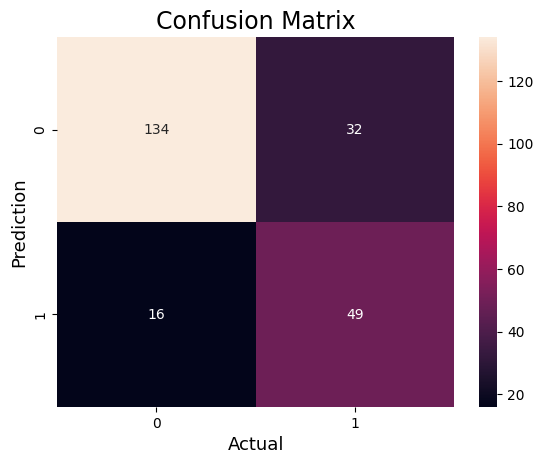

In [16]:
# Альтернативный вариант:
def quality_report_(prediction):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(prediction, y_test))

    sns.heatmap(confusion_matrix(prediction, y_test),
                annot=True,
                fmt='g')
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
quality_report_(pred_svc_ker)